## Capstone Project-2 Auto Insurance Fraud Detection
### Data wrangling

Imports

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


Load fraud_detect Dataset

In [70]:
df= pd.read_csv('fraud_detect.csv')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Explore The Data

In [72]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


### Numerical Features

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


Categorical Features

In [74]:
df.iloc[:,0:18].select_dtypes(include='object'),df.iloc[:,18:-1].select_dtypes(include='object')

(      Month  DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
 0       Dec  Wednesday    Honda        Urban          Tuesday          Jan   
 1       Jan  Wednesday    Honda        Urban           Monday          Jan   
 2       Oct     Friday    Honda        Urban         Thursday          Nov   
 3       Jun   Saturday   Toyota        Rural           Friday          Jul   
 4       Jan     Monday    Honda        Urban          Tuesday          Feb   
 ...     ...        ...      ...          ...              ...          ...   
 15415   Nov     Friday   Toyota        Urban          Tuesday          Nov   
 15416   Nov   Thursday  Pontiac        Urban           Friday          Dec   
 15417   Nov   Thursday   Toyota        Rural           Friday          Dec   
 15418   Dec     Monday   Toyota        Urban         Thursday          Dec   
 15419   Dec  Wednesday   Toyota        Urban         Thursday          Dec   
 
           Sex MaritalStatus          Fault       

Number Of Missing Values By Column

In [75]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing

,count,%
Month,0,0.0
WeekOfMonth,0,0.0
DayOfWeek,0,0.0
Make,0,0.0
AccidentArea,0,0.0
DayOfWeekClaimed,0,0.0
MonthClaimed,0,0.0
WeekOfMonthClaimed,0,0.0
Sex,0,0.0
MaritalStatus,0,0.0


Number of Unique Values By Column 

In [76]:
df.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [77]:
for i in df.columns:
    print((i),"-->",df[i].unique(),"\n")

Month --> ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep'] 

WeekOfMonth --> [5 3 2 4 1] 

DayOfWeek --> ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make --> ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea --> ['Urban' 'Rural'] 

DayOfWeekClaimed --> ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0'] 

MonthClaimed --> ['Jan' 'Nov' 'Jul' 'Feb' 'Mar' 'Dec' 'Apr' 'Aug' 'May' 'Jun' 'Sep' 'Oct'
 '0'] 

WeekOfMonthClaimed --> [1 4 2 3 5] 

Sex --> ['Female' 'Male'] 

MaritalStatus --> ['Single' 'Married' 'Widow' 'Divorced'] 

Age --> [21 34 47 65 27 20 36  0 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55
 35 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43
 57 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault --> ['Policy Holder' 'Third Party'] 



In [78]:
df.duplicated().sum()

0

Drop Rows With '0' and 'None' values 

In [79]:
df[df['DayOfWeekClaimed']=="0"]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [80]:
df[df['MonthClaimed']=="0"]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


Both the "MonthClaimed" and "DayOfWeekClaimed" features show a value of 0 in the same index so consider to dropping the corresponding rows. 

In [81]:
df = df.drop(df[df['DayOfWeekClaimed']=="0"].index)

In [82]:
df['Age'].value_counts().sort_index().head()

Age
0     319
16      9
17      6
18     48
19     32
Name: count, dtype: int64

In [83]:
df = df.drop(df[df['Age']==0].index)

In [84]:
df.groupby('AgeOfPolicyHolder')['Age'].value_counts().head(10)

AgeOfPolicyHolder  Age
18 to 20           16       9
                   17       6
21 to 25           18      48
                   19      32
                   20      28
26 to 30           24     135
                   21     127
                   22     125
                   23     122
                   25     104
Name: count, dtype: int64

It seems like there might be an issue with the data of the "AgeOfPolicyHolder" feature in dataset. If the age values for the age group of 18 to 20 are showing as 16 and 17, and the issue with inaccurate age values is widespread across most age groups in dataset. It could be a data entry error or a misinterpretation of the data.

In [85]:
df = df.drop('AgeOfPolicyHolder',axis=1)

In [86]:
df.shape

(15100, 32)

In [87]:
df['Days_Policy_Accident'].value_counts()

Days_Policy_Accident
more than 30    14927
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: count, dtype: int64

In [88]:
df = df.drop(df[df['Days_Policy_Accident']== 'none'].index)

In [89]:
df.shape

(15045, 32)

Count '0' and 'None' values in other columns

In [90]:
df['PastNumberOfClaims'].value_counts()

PastNumberOfClaims
2 to 4         5361
none           4221
1              3494
more than 4    1969
Name: count, dtype: int64

In [91]:
df['NumberOfSuppliments'].value_counts()

NumberOfSuppliments
none           6681
more than 5    3865
1 to 2         2484
3 to 5         2015
Name: count, dtype: int64

In the subsequent step, replace these missing values with the value '0' to signify the assumption that there are no claims or supplements associated with those records.

Distributions Of Feature Values

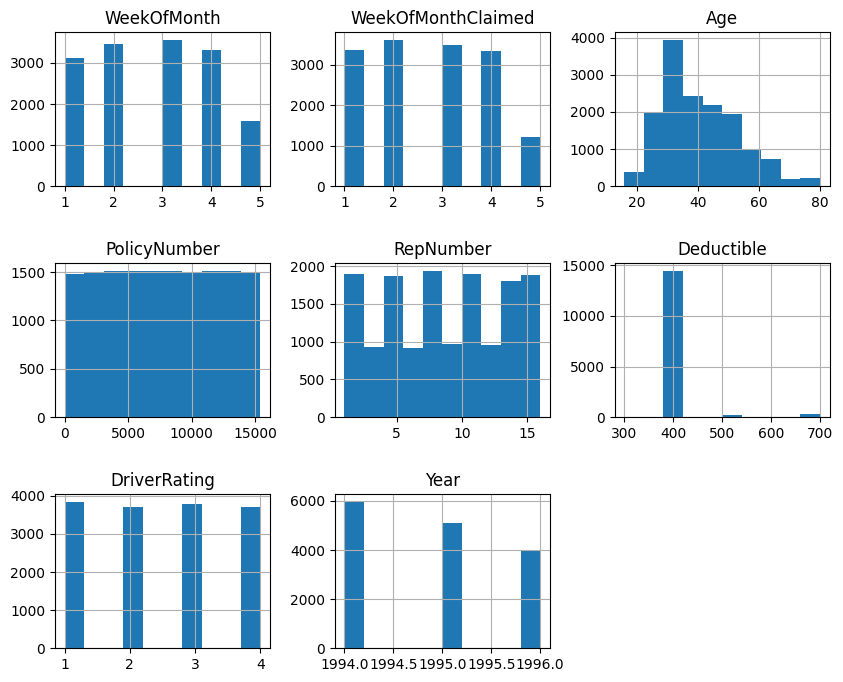

In [92]:
(df.drop('FraudFound_P',axis=1)).hist(figsize=(10,8))
plt.subplots_adjust(hspace=0.5)

In [93]:
df['Deductible'].value_counts()


Deductible
400    14466
700      311
500      261
300        7
Name: count, dtype: int64

Target Feature 'FraudFound_P'

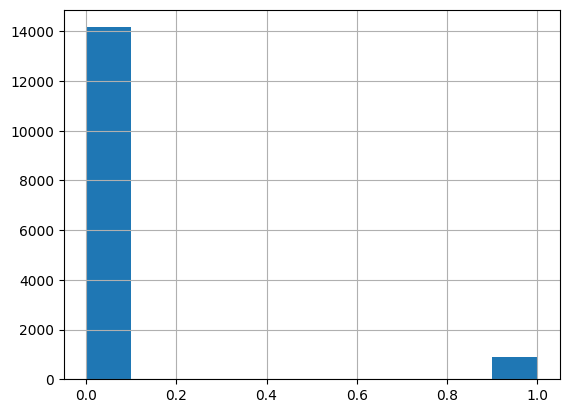

In [94]:
df['FraudFound_P'].hist()
plt.show()

In [95]:
df['FraudFound_P'].value_counts()

FraudFound_P
0    14162
1      883
Name: count, dtype: int64

In [96]:
Fraud =df['FraudFound_P']
Fraud.value_counts()/len(Fraud)*100

FraudFound_P
0    94.130941
1     5.869059
Name: count, dtype: float64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15045 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15045 non-null  object
 1   WeekOfMonth           15045 non-null  int64 
 2   DayOfWeek             15045 non-null  object
 3   Make                  15045 non-null  object
 4   AccidentArea          15045 non-null  object
 5   DayOfWeekClaimed      15045 non-null  object
 6   MonthClaimed          15045 non-null  object
 7   WeekOfMonthClaimed    15045 non-null  int64 
 8   Sex                   15045 non-null  object
 9   MaritalStatus         15045 non-null  object
 10  Age                   15045 non-null  int64 
 11  Fault                 15045 non-null  object
 12  PolicyType            15045 non-null  object
 13  VehicleCategory       15045 non-null  object
 14  VehiclePrice          15045 non-null  object
 15  FraudFound_P          15045 non-null  int

In [98]:
for i in df.columns:
    print((i),"-->",df[i].unique(),"\n")

Month --> ['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep' 'Nov'] 

WeekOfMonth --> [5 3 2 4 1] 

DayOfWeek --> ['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday'] 

Make --> ['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus'] 

AccidentArea --> ['Urban' 'Rural'] 

DayOfWeekClaimed --> ['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'] 

MonthClaimed --> ['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct'] 

WeekOfMonthClaimed --> [1 4 2 3 5] 

Sex --> ['Female' 'Male'] 

MaritalStatus --> ['Single' 'Married' 'Widow' 'Divorced'] 

Age --> [21 34 47 65 27 20 36 30 42 71 52 28 61 38 41 32 40 63 31 45 60 39 55 35
 44 72 29 37 59 49 50 26 48 64 33 74 23 25 56 16 68 18 51 22 53 46 43 57
 54 69 67 19 78 77 75 80 58 73 24 76 62 79 70 17 66] 

Fault --> ['Policy Holder' 'Third Party'] 

PolicyType --

In [99]:
df.shape

(15045, 32)

In [100]:
df.to_csv('fraud_detect_cleaned.csv')